<h1>Лабораторна робота 3</h1>
<h2>Студентки групи МІТ-31</h2>
<h2>Агафонової Мирослави</h2>

In [10]:
import numpy as np
import matplotlib as plt
import sklearn.model_selection
import sklearn.datasets
import pandas as pd
import seaborn as sns

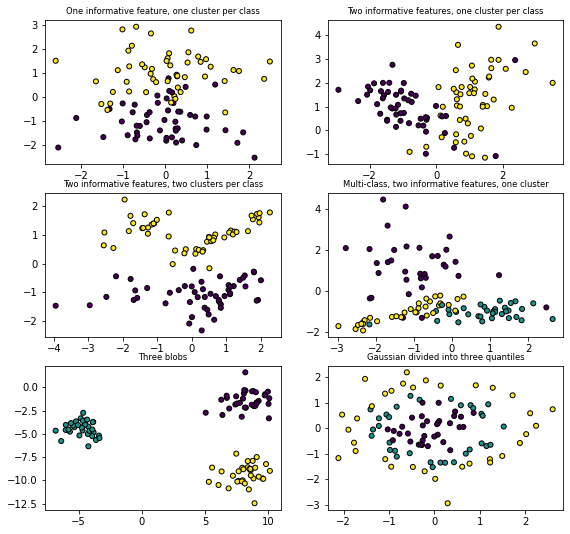

In [38]:
import matplotlib.pyplot as plt

from sklearn.datasets import make_classification
from sklearn.datasets import make_blobs
from sklearn.datasets import make_gaussian_quantiles

plt.figure(figsize=(8, 8))
plt.subplots_adjust(bottom=.05, top=.9, left=.05, right=.95)

plt.subplot(321)
plt.title("One informative feature, one cluster per class", fontsize='small')
X1, Y1 = make_classification(n_features=2, n_redundant=0, n_informative=1,
                             n_clusters_per_class=1)
plt.scatter(X1[:, 0], X1[:, 1], marker='o', c=Y1,
            s=25, edgecolor='k')

plt.subplot(322)
plt.title("Two informative features, one cluster per class", fontsize='small')
X1, Y1 = make_classification(n_features=2, n_redundant=0, n_informative=2,
                             n_clusters_per_class=1)
plt.scatter(X1[:, 0], X1[:, 1], marker='o', c=Y1,
            s=25, edgecolor='k')

plt.subplot(323)
plt.title("Two informative features, two clusters per class",
          fontsize='small')
X2, Y2 = make_classification(n_features=2, n_redundant=0, n_informative=2)
plt.scatter(X2[:, 0], X2[:, 1], marker='o', c=Y2,
            s=25, edgecolor='k')

plt.subplot(324)
plt.title("Multi-class, two informative features, one cluster",
          fontsize='small')
X1, Y1 = make_classification(n_features=2, n_redundant=0, n_informative=2,
                             n_clusters_per_class=1, n_classes=3)
plt.scatter(X1[:, 0], X1[:, 1], marker='o', c=Y1,
            s=25, edgecolor='k')

plt.subplot(325)
plt.title("Three blobs", fontsize='small')
X1, Y1 = make_blobs(n_features=2, centers=3)
plt.scatter(X1[:, 0], X1[:, 1], marker='o', c=Y1,
            s=25, edgecolor='k')

plt.subplot(326)
plt.title("Gaussian divided into three quantiles", fontsize='small')
X1, Y1 = make_gaussian_quantiles(n_features=2, n_classes=3)
plt.scatter(X1[:, 0], X1[:, 1], marker='o', c=Y1,
            s=25, edgecolor='k')

plt.show()

In [12]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
drugs = pd.read_csv('./drug200.csv')
drugs.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,DrugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,DrugY


In [13]:
print(drugs.shape)

(200, 6)


In [14]:
print(drugs['Drug'].unique())

['DrugY' 'drugC' 'drugX' 'drugA' 'drugB']


In [15]:
print(drugs.groupby('Drug').size())

Drug
DrugY    91
drugA    23
drugB    16
drugC    16
drugX    54
dtype: int64


C:\Users\myroslava.ahafonova\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


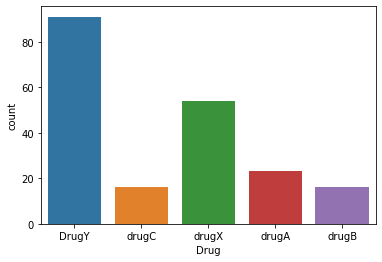

In [16]:
import seaborn as sns
sns.countplot(drugs['Drug'],label="Count")
plt.show()

Box plot for each numeric variable will give us a clearer idea of the distribution of the input variables:

It looks like perhaps age score has a near Gaussian distribution.

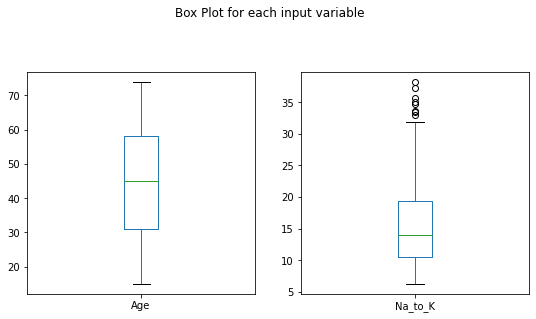

In [17]:
drugs.drop('Cholesterol', axis=1).plot(kind='box', subplots=True, layout=(2,2), sharex=False, sharey=False, figsize=(9,9), 
                                        title='Box Plot for each input variable')
plt.savefig('drugs_box')
plt.show()

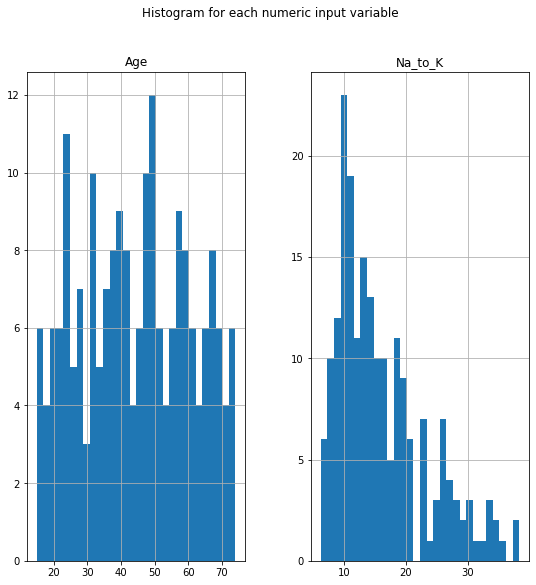

In [18]:
import pylab as pl
drugs.drop('Cholesterol' ,axis=1).hist(bins=30, figsize=(9,9))
pl.suptitle("Histogram for each numeric input variable")
plt.savefig('drugs_hist')
plt.show()

We can see that the numerical values do not have the same scale. We will need to apply scaling to the test set that we computed for the training set.

In [33]:
import numpy as np
import matplotlib as plt
import sklearn.model_selection
import sklearn.datasets
import pandas as pd
import seaborn as sns
from sklearn.datasets import make_classification

In [34]:
X, y = sklearn.datasets.make_classification(n_samples=1024, n_features=20, class_sep=0.98, random_state=0)
model1 = (sklearn.model_selection.train_test_split(X, y, test_size=0.5, random_state=0),) # x_train, x_test, y_train, y_test

model2 = pd.DataFrame(data={'X':[np.random.uniform(-4.0, 4.0) for i in range(1000)],'Y':[np.random.uniform(-300.0, 300.0) for i in range(1000)],'Z':['90.0' for i in range(1000)]})


Create Training and Test Sets and Apply Scaling

In [35]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

Build Models


In [36]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

Logistic Regression

In [37]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
print('Accuracy of Logistic regression classifier on training set: {:.2f}'
     .format(logreg.score(X_train, y_train)))
print('Accuracy of Logistic regression classifier on test set: {:.2f}'
     .format(logreg.score(X_test, y_test)))

Accuracy of Logistic regression classifier on training set: 0.92
Accuracy of Logistic regression classifier on test set: 0.91


Decision Tree

In [38]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier().fit(X_train, y_train)
print('Accuracy of Decision Tree classifier on training set: {:.2f}'
     .format(clf.score(X_train, y_train)))
print('Accuracy of Decision Tree classifier on test set: {:.2f}'
     .format(clf.score(X_test, y_test)))

Accuracy of Decision Tree classifier on training set: 1.00
Accuracy of Decision Tree classifier on test set: 0.86


K-Nearest Neighbors

In [39]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
print('Accuracy of K-NN classifier on training set: {:.2f}'
     .format(knn.score(X_train, y_train)))
print('Accuracy of K-NN classifier on test set: {:.2f}'
     .format(knn.score(X_test, y_test)))

Accuracy of K-NN classifier on training set: 0.93
Accuracy of K-NN classifier on test set: 0.87


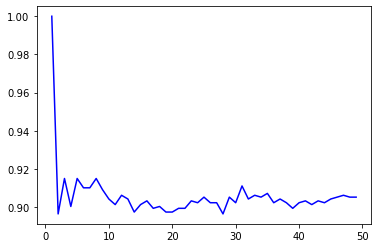

In [40]:
from sklearn import metrics
from sklearn.neighbors import KNeighborsClassifier
v=[]

k_range = list(range(1, 50))
for i in k_range:
    knn = KNeighborsClassifier(n_neighbors=i)
    # fit the model with data
    knn.fit(X, y)
    k_pred = knn.predict(X)
    v.append( metrics.accuracy_score(y, k_pred))


import matplotlib.pyplot as plt
plt.plot(k_range,v,c='Blue',)
plt.show()

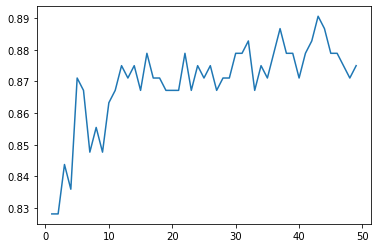

In [41]:
from sklearn import metrics
v=[]


k_range = list(range(1, 50))
for i in k_range:
    knn = KNeighborsClassifier(n_neighbors=i)
    # fit the model with data
    knn.fit(X_train, y_train)
    k_pred = knn.predict(X_test)
    v.append( metrics.accuracy_score(y_test, k_pred))



import matplotlib.pyplot as plt
plt.plot(k_range,v)

plt.show()

In [42]:
knn = KNeighborsClassifier(n_neighbors=12)
# fit the model with data
knn.fit(X_train, y_train)
k_pred = knn.predict(X_test)

metrics.accuracy_score(y_test, k_pred)

0.875

Linear Discriminant Analysis

In [24]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
lda = LinearDiscriminantAnalysis()
lda.fit(X_train, y_train)
print('Accuracy of LDA classifier on training set: {:.2f}'
     .format(lda.score(X_train, y_train)))
print('Accuracy of LDA classifier on test set: {:.2f}'
     .format(lda.score(X_test, y_test)))

Accuracy of LDA classifier on training set: 0.93
Accuracy of LDA classifier on test set: 0.91


Gaussian Naive Bayes

In [25]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(X_train, y_train)
print('Accuracy of GNB classifier on training set: {:.2f}'
     .format(gnb.score(X_train, y_train)))
print('Accuracy of GNB classifier on test set: {:.2f}'
     .format(gnb.score(X_test, y_test)))

Accuracy of GNB classifier on training set: 0.92
Accuracy of GNB classifier on test set: 0.88


Support Vector Machine

In [26]:
from sklearn.svm import SVC
svm = SVC()
svm.fit(X_train, y_train)
print('Accuracy of SVM classifier on training set: {:.2f}'
     .format(svm.score(X_train, y_train)))
print('Accuracy of SVM classifier on test set: {:.2f}'
     .format(svm.score(X_test, y_test)))

Accuracy of SVM classifier on training set: 0.96
Accuracy of SVM classifier on test set: 0.91


The KNN algorithm was the most accurate model that we tried. The confusion matrix provides an indication of no error made on the test set. However, the test set was very small.

In [27]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
pred = knn.predict(X_test)
print(confusion_matrix(y_test, pred))
print(classification_report(y_test, pred))

[[104  22]
 [ 11 119]]
              precision    recall  f1-score   support

           0       0.90      0.83      0.86       126
           1       0.84      0.92      0.88       130

    accuracy                           0.87       256
   macro avg       0.87      0.87      0.87       256
weighted avg       0.87      0.87      0.87       256



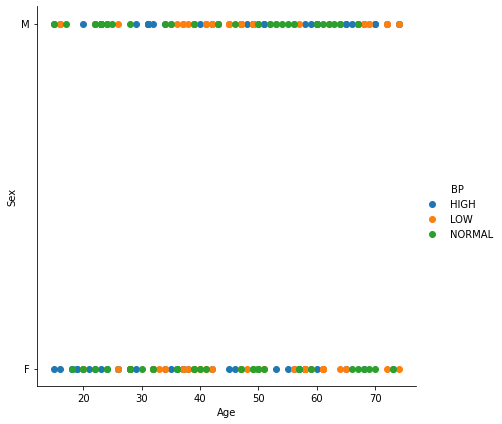

In [4]:
import seaborn as sns
import pandas as pd

import matplotlib.pyplot as plt
drugs1 = pd.read_csv('./drug200.csv')
sns.FacetGrid(drugs1, hue="BP", size=6) \
   .map(plt.scatter, 'Age', 'Sex') \
   .add_legend()

plt.show()

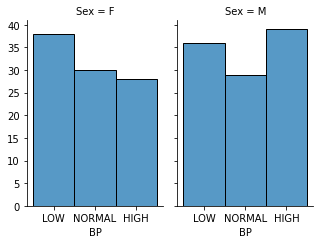

In [18]:
import seaborn as sns
import pandas as pd
drugs1 = pd.read_csv('./drug200.csv')
g = sns.FacetGrid(drugs1, col="Sex", height=3.5, aspect=.65)
g.map(sns.histplot, "BP")

In [14]:
import random as rnd
import sklearn
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib as plt
import sklearn.model_selection
import sklearn.datasets
import pandas as pd
import seaborn as sns

Laptop_param = {0:'Asus', 1:'Lenovo'}
time = {0:'<120', 1:'>120'}
version = {0:'new', 1:'unpacked'}
supported = {0:'YES', 1:'NO'}
copies = {0:'5', 1:'6', 2:'7', 3:'8'}
store = {0:'cactus', 1:'foxtrot', 2:'comfy', 3:'eldorado'}
data = []
for i in range(0, 512):
    row = []
    row.append(round(rnd.uniform(1, 50), 2))
    row.append(round(rnd.uniform(1, 10), 2))
    row.append(Laptop_param[rnd.randint(0, 1)])
    row.append(time[rnd.randint(0, 1)])
    row.append(version[rnd.randint(0, 1)])
    row.append(supported[rnd.randint(0, 1)])
    row.append(copies[rnd.randint(0, 3)])
    row.append(store[rnd.randint(0, 3)])
    data.append(row)
df = pd.DataFrame(data, columns=['total_utility_bill', 'commission', 'Laptop_param', 'time', 'version', 'supported', 'copies', 'store'])

In [15]:
df.replace({'Asus': 0, 'Lenovo':1, '<120': 0, '>120':1, 'new':0, 'unpacked':1, 'YES':0, 'NO':1, '5':5, '6':6, '7':7, '8':8, 'cactus': 0
, 'foxtrot':1, 'comfy':2, 'eldorado':3}, None, True)

In [16]:
df.head()

,total_utility_bill,commission,Laptop_param,time,version,supported,copies,store
0,20.68,3.23,0,0,1,0,8,1
1,32.35,1.93,0,0,1,1,6,2
2,23.48,4.53,1,0,1,1,8,1
3,3.51,5.16,0,0,1,0,8,0
4,21.63,8.10,1,1,1,0,8,1


In [17]:
df.tail()

,total_utility_bill,commission,Laptop_param,time,version,supported,copies,store
507,16.78,7.70,0,1,0,1,7,0
508,7.95,9.60,1,0,1,1,8,1
509,44.86,5.09,1,1,1,1,8,1
510,36.08,5.02,0,0,1,1,6,2
511,31.12,8.09,0,1,0,1,7,1


In [18]:

print("Laptop_param")
print(df['Laptop_param'].unique())

Laptop_param
[0 1]


In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 512 entries, 0 to 511
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   total_utility_bill  512 non-null    float64
 1   commission          512 non-null    float64
 2   Laptop_param        512 non-null    int64  
 3   time                512 non-null    int64  
 4   version             512 non-null    int64  
 5   supported           512 non-null    int64  
 6   copies              512 non-null    int64  
 7   store               512 non-null    int64  
dtypes: float64(2), int64(6)
memory usage: 32.1 KB


In [20]:
df.describe()

,total_utility_bill,commission,Laptop_param,time,version,supported,copies,store
count,512.000000,512.000000,512.000000,512.000000,512.000000,512.000000,512.000000,512.000000
mean,26.417246,5.440586,0.509766,0.490234,0.492188,0.492188,6.503906,1.486328
std,13.886521,2.649131,0.500394,0.500394,0.500428,0.500428,1.113862,1.092497
min,1.100000,1.020000,0.000000,0.000000,0.000000,0.000000,5.000000,0.000000
25%,14.157500,3.107500,0.000000,0.000000,0.000000,0.000000,6.000000,1.000000
50%,26.320000,5.455000,1.000000,0.000000,0.000000,0.000000,7.000000,1.000000
75%,38.397500,7.787500,1.000000,1.000000,1.000000,1.000000,7.000000,2.000000
max,49.940000,9.990000,1.000000,1.000000,1.000000,1.000000,8.000000,3.000000


C:\Users\myroslava.ahafonova\Anaconda3\lib\site-packages\seaborn\axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


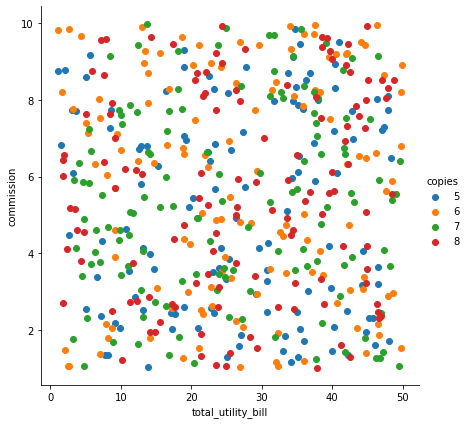

In [27]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from random import randrange
from random import randint
from random import uniform
from sklearn import metrics
sns.FacetGrid(df, hue="copies", size=6) \
   .map(plt.scatter, "total_utility_bill", "commission") \
   .add_legend()

plt.show()

In [28]:
features = list(df.columns[1:6])            	
target = df.columns[6]                     

print('Features:',features)
print('Target:',target)

# store feature matrix in "X"
X = df.iloc[:,1:6]                         

# store response vector in "y"
y = df.iloc[:,6]                           


print(y.shape)
print(X.shape)

Features: ['commission', 'Laptop_param', 'time', 'version', 'supported']
Target: copies
(512,)
(512, 5)


In [29]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
le.fit(y)
y=le.transform(y)


df['Encodedsize'] = y

print('Classes:',le.classes_)
print('Response variable after encoding:',y)
df.tail(10)

Classes: [5 6 7 8]
Response variable after encoding: [3 1 3 3 3 3 0 0 3 1 1 1 3 2 2 0 1 3 0 1 0 2 2 0 1 0 3 1 3 3 1 0 2 3 0 3 3
 3 2 2 0 2 2 2 0 2 1 2 1 3 0 1 1 2 1 0 0 0 2 0 1 0 1 1 1 1 1 3 0 1 2 1 3 1
 2 1 0 3 1 0 2 0 2 2 0 3 2 0 2 2 3 2 0 3 0 2 3 3 0 1 1 2 0 3 2 2 2 0 1 2 0
 1 0 0 0 1 0 3 3 0 1 0 2 2 3 2 1 2 3 1 1 2 3 2 2 0 3 2 0 1 1 2 3 0 1 0 3 1
 0 2 0 3 1 1 1 1 3 1 1 1 0 1 3 1 3 2 0 1 3 0 2 3 2 0 1 3 1 2 0 2 3 0 0 1 0
 3 1 0 2 1 0 2 0 1 0 1 3 3 0 1 2 3 1 1 1 1 1 0 2 2 3 0 1 0 2 2 2 3 1 3 0 1
 2 0 2 2 0 2 3 3 1 0 1 3 0 2 3 2 0 1 3 0 2 2 1 1 1 2 2 2 0 2 2 2 2 0 2 0 1
 1 1 3 0 1 1 2 0 1 1 3 2 0 3 1 1 2 2 1 1 2 3 2 3 1 0 1 3 2 0 0 2 2 2 2 3 3
 3 1 2 3 3 3 0 0 3 1 3 3 1 1 3 3 1 0 1 1 0 0 2 1 0 1 3 2 2 2 1 3 3 3 2 0 3
 3 0 3 2 0 2 3 0 2 0 3 0 0 2 3 2 3 3 0 2 3 2 1 3 3 0 0 3 0 0 0 1 0 1 1 2 2
 3 3 2 2 2 1 3 0 3 3 0 2 3 1 3 1 1 2 3 0 0 2 2 1 2 2 1 0 1 3 1 3 3 0 3 0 2
 1 0 2 2 1 2 1 2 3 3 2 2 3 2 3 3 0 3 2 2 0 0 3 1 3 1 1 0 3 2 0 3 3 3 3 3 3
 0 2 3 3 1 2 2 0 2 1 0 2 3 2 0 0 3 3 3 3 3 0 0 

,total_utility_bill,commission,Laptop_param,time,version,supported,copies,store,Encodedsize
502,1.64,8.22,1,0,0,0,6,0,1
503,29.04,3.40,1,0,1,1,8,3,3
504,31.71,7.96,0,1,0,0,5,3,0
505,34.14,9.33,0,0,0,0,6,2,1
506,40.65,2.71,1,0,1,1,6,0,1
507,16.78,7.70,0,1,0,1,7,0,2
508,7.95,9.60,1,0,1,1,8,1,3
509,44.86,5.09,1,1,1,1,8,1,3
510,36.08,5.02,0,0,1,1,6,2,1
511,31.12,8.09,0,1,0,1,7,1,2


In [30]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X, y)

KNeighborsClassifier(n_neighbors=1)

In [32]:
value = knn.predict([[3, 5, 4, 2, 1]])
print('prediction value:',value)

print('Predicted Class', df.loc[df['Encodedsize'] == 2, 'copies'].values[0])

prediction value: [1]
Predicted Class 7


In [33]:
X_new = [[3, 5, 4, 2, 1], [5, 4, 3, 2, 1]]                       
knn.predict(X_new)

array([1, 2], dtype=int64)

In [35]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X, y)

print(knn.predict(X_new))

kypred = knn.predict(X)

[3 2]


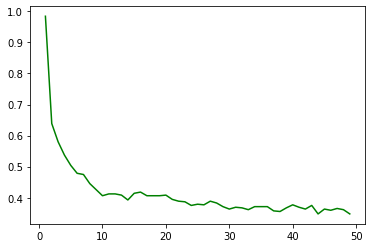

In [37]:

from sklearn import metrics
v=[]

k_range = list(range(1, 50))
for i in k_range:
    knn = KNeighborsClassifier(n_neighbors=i)
    # fit the model with data
    knn.fit(X, y)
    k_pred = knn.predict(X)
    v.append( metrics.accuracy_score(y, k_pred))


import matplotlib.pyplot as plt
plt.plot(k_range,v,c='Green',)
plt.show()

KNN

In [38]:
from sklearn import metrics
print(metrics.accuracy_score(y, kypred))

0.50390625


In [39]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=4)

In [40]:
print(X_train.shape)
print(y_train.shape)

(307, 5)
(307,)


In [42]:
knn = KNeighborsClassifier(n_neighbors=12)
# fit the model with data
knn.fit(X_train, y_train)
k_pred = knn.predict(X_test)

metrics.accuracy_score(y_test, k_pred)

0.24878048780487805

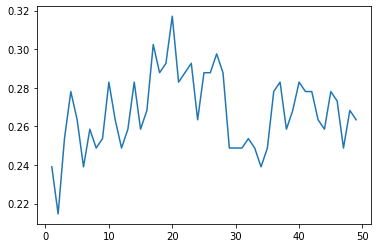

In [41]:
from sklearn import metrics
v=[]


k_range = list(range(1, 50))
for i in k_range:
    knn = KNeighborsClassifier(n_neighbors=i)
    # fit the model with data
    knn.fit(X_train, y_train)
    k_pred = knn.predict(X_test)
    v.append( metrics.accuracy_score(y_test, k_pred))



import matplotlib.pyplot as plt
plt.plot(k_range,v)

plt.show()